# 보스톤 주택 가격 - 다중 회귀

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 산점도와 회귀 곡선

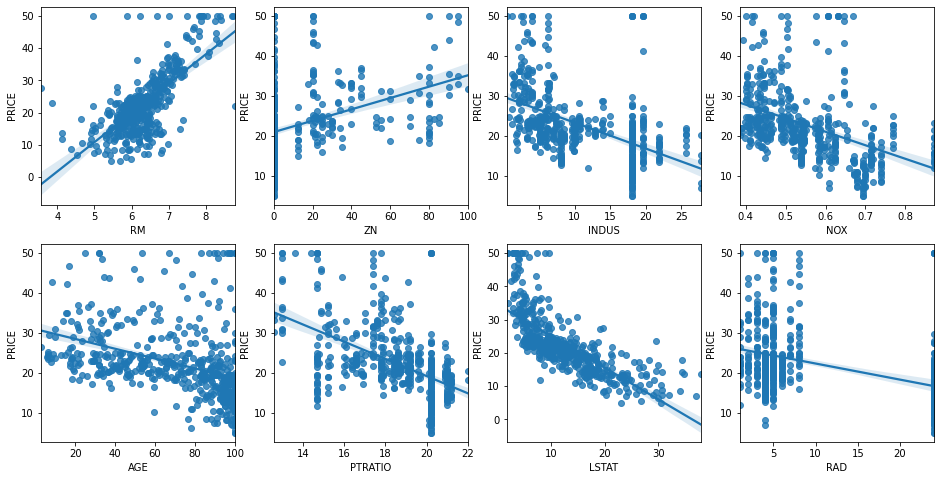

In [5]:
fig, asx = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row, col = int(i/4), i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=asx[row][col])

### Scikit-Learn 회귀 모델

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.3, random_state=156
)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}')
print(f'R_squared: {r2:.4f}')

MSE: 17.30, RMSE: 4.16
R_squared: 0.7572


In [9]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [10]:
lr.intercept_

40.99559517216412

### 회귀식
- PRICE = -1.13*CRIM + 0.065*ZN + 0.034*INDUS + 3.05*CHAS - 0.198*NOX + 3.35*RM + 0.006*AGE - 1.74*DIS + 0.356*RAD - 0.014*TAX - 0.92*PTRATIO + 0.01*B - 0.566*LSTAT + 40.99

### 교차 검증 - cross_val_score

In [11]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [12]:
# 5 폴드 세트로 MSE를 구함
neg_mean_scores = cross_val_score(lr, boston.data, boston.target,
                                 scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_mean_scores)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_mean_scores,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-12.46 -26.05 -33.07 -80.76 -33.31]
개별 RMSE: [3.53 5.1  5.75 8.99 5.77]
평균 RMSE: 5.8287
